# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_mice = df.loc[df.duplicated(subset=["Mouse ID", "Timepoint"], keep="last")]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df.loc[df["Mouse ID"] != "g989"]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
summ1 = df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
summ1


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

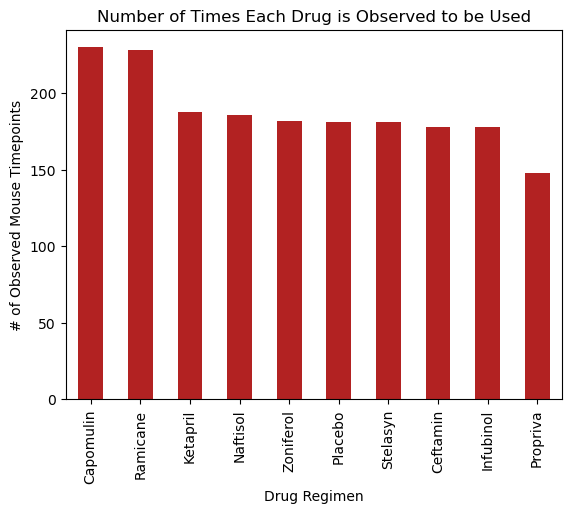

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = pd.DataFrame(df.value_counts("Drug Regimen"))
drug_counts.plot(kind="bar", 
                y="count", 
                use_index=True, 
                ylabel="# of Observed Mouse Timepoints",
                title="Number of Times Each Drug is Observed to be Used",
                color="firebrick", 
                legend=False)
plt.show()

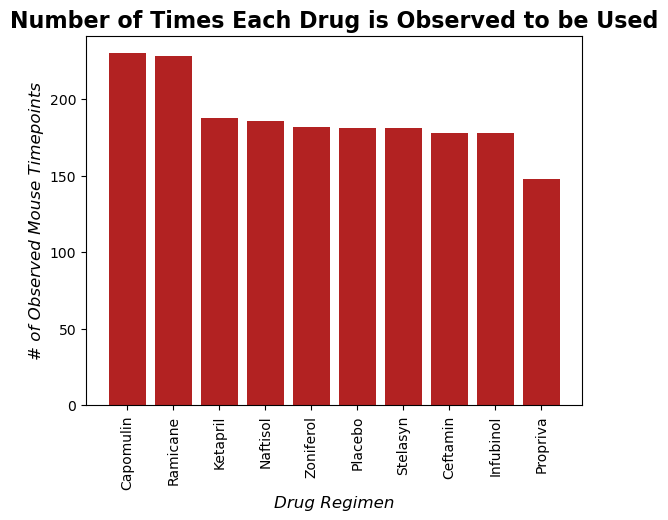

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = pd.DataFrame(df.value_counts("Drug Regimen"))
x = drug_counts.index.to_list()
y = drug_counts["count"].to_list()

plt.bar(x, y, color="firebrick")

plt.title("Number of Times Each Drug is Observed to be Used", fontsize=16, fontweight="bold")
plt.xlabel("Drug Regimen", fontsize=12, fontstyle="italic")
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12, fontstyle="italic")
plt.xticks(rotation="vertical")


plt.show()

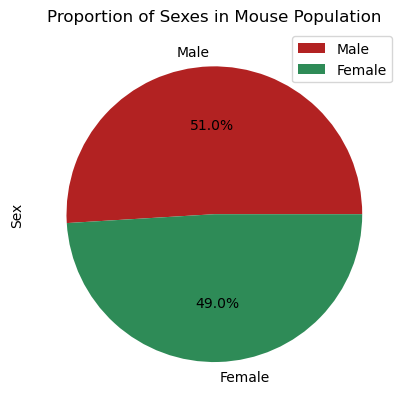

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = pd.DataFrame(df.value_counts("Sex"))
sex_counts.plot(kind="pie", 
                y="count", 
                use_index=True, 
                ylabel="Sex",
                title="Proportion of Sexes in Mouse Population", 
                autopct="%1.1f%%",
                colors=["firebrick", "seagreen"])
plt.show()

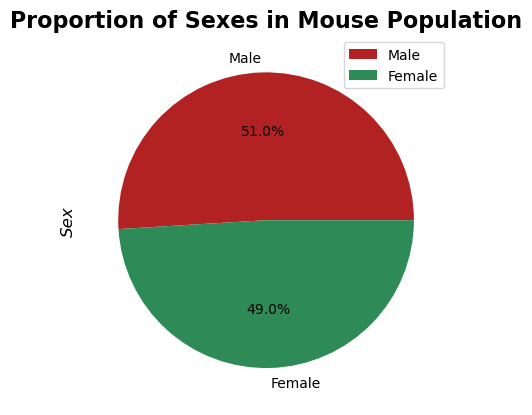

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = pd.DataFrame(df.value_counts("Sex"))

labels = sex_counts.index.to_list()
counts = sex_counts["count"].to_list()

plt.pie(counts, labels=labels, colors=["firebrick", "seagreen"], autopct="%1.1f%%")

plt.title("Proportion of Sexes in Mouse Population", fontsize=16, fontweight="bold")
plt.ylabel("Sex", fontsize=12, fontstyle="italic")
plt.legend()

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments_df = df.loc[df["Drug Regimen"].isin(treatments)].reset_index(drop=True)


# Start by getting the last (greatest) timepoint for each mouse

max_timepoints = treatments_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_time_df = pd.merge(treatments_df, max_timepoints, how="right", on=["Timepoint", "Mouse ID"])

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows = final_time_df.loc[final_time_df["Drug Regimen"] == treatment]
    tumor_sizes = rows["Tumor Volume (mm3)"]
    # add subset 
    tumor_vol.append(tumor_sizes.to_list())
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_sizes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = rows.loc[(tumor_sizes > upper_bound) | (tumor_sizes < lower_bound)]["Tumor Volume (mm3)"]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


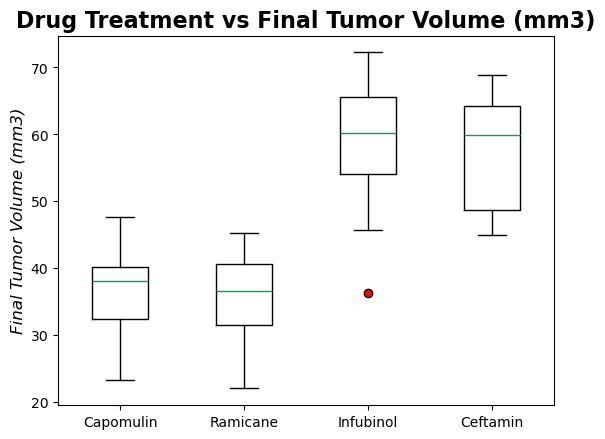

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, 
            labels=treatments, 
            flierprops={"markerfacecolor": "red",
                        "markeredgecolor": "black"},
            medianprops={"color": "seagreen"})

plt.title("Drug Treatment vs Final Tumor Volume (mm3)", fontsize=16, fontweight="bold")
plt.ylabel("Final Tumor Volume (mm3)", fontsize=12, fontstyle="italic")

plt.show()

## Line and Scatter Plots

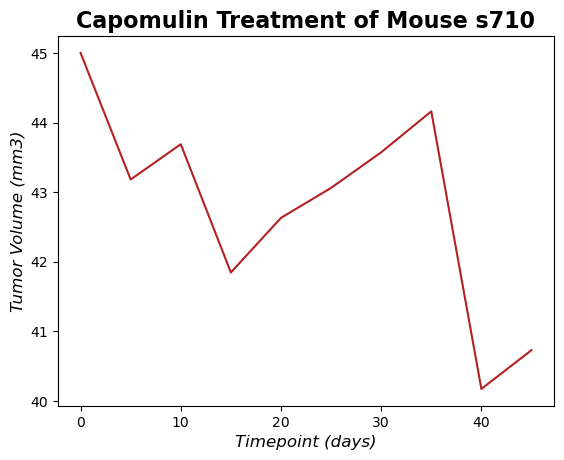

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = df.loc[df["Drug Regimen"] == "Capomulin"].reset_index(drop=True)
mouse = "s710"
mask = cap_df["Mouse ID"] == mouse
mouse_tumor_vol = cap_df.loc[mask]["Tumor Volume (mm3)"]
mouse_time = cap_df.loc[mask]["Timepoint"]

plt.plot(mouse_time, mouse_tumor_vol, color="firebrick")
plt.title("Capomulin Treatment of Mouse s710", fontsize=16, fontweight="bold")
plt.xlabel("Timepoint (days)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")

plt.show()

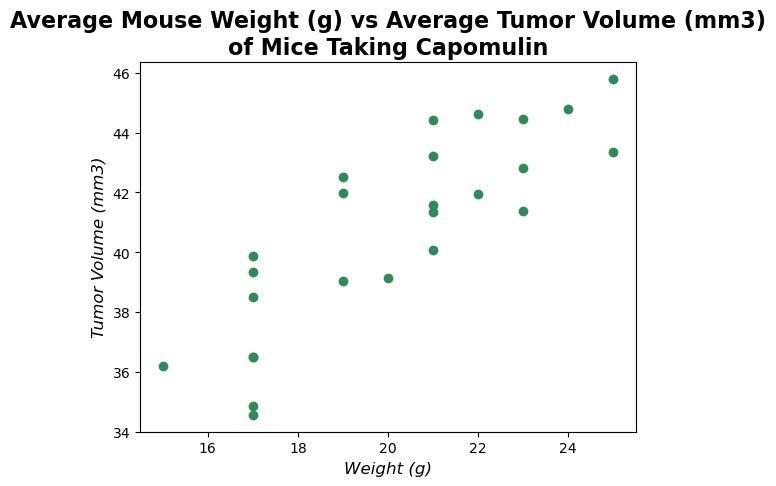

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x = cap_df.groupby("Mouse ID")["Weight (g)"].mean()
y = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(x, y, color="seagreen")

plt.title("Average Mouse Weight (g) vs Average Tumor Volume (mm3)\nof Mice Taking Capomulin", fontsize=16, fontweight="bold")
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")

plt.show()

## Correlation and Regression

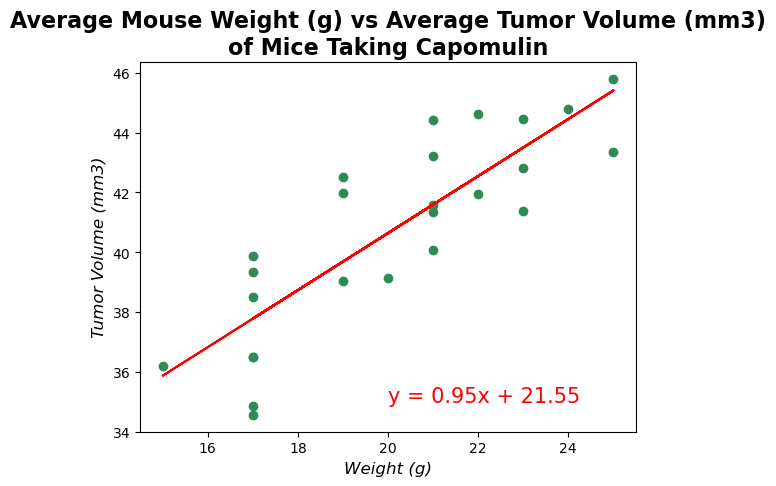

The r-squared is: 0.7088568047708723


In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = cap_df.groupby("Mouse ID")["Weight (g)"].mean()
y = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x, y, color="seagreen")
plt.plot(x, regress_values, "r-") # plot the line of best fit

plt.title("Average Mouse Weight (g) vs Average Tumor Volume (mm3)\nof Mice Taking Capomulin", fontsize=16, fontweight="bold")
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.annotate(line_eq,(20, 35),fontsize=15,color="red")

plt.show()
print(f"The r-squared is: {rvalue**2}")